Made by Ekaterina Tyukavkina and Igor Malysh

# Task 5. Linear Regression Analysis

Analyze the data on Global AI Job Market & Salary Trends 2025.

[Source](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025)

The file `ai_job_dataset.csv` contains the following variables:

| Variable name | Variable description
|:-------------------:|:------------------:|
| job_id | Unique identifier for each job posting |
| job_title | Standardized job title | 
| salary_usd | Annual salary in USD| 
| salary_currency | Original salary currency| 
| salary_local | Salary in local currency| 
| experience_level | EN (Entry), MI (Mid), SE (Senior), EX (Executive)| 
| employment_type |	FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance)| 
| company_location | Country where company is located| 	
| company_size | S (Small <50), M (Medium 50-250), L (Large >250)| 
| employee_residence |	Country where employee resides|
| remote_ratio | 0 (No remote), 50 (Hybrid), 100 (Fully remote)|
| required_skills |	Top 5 required skills (comma-separated)|
| education_required |	Minimum education requirement|
| years_experience | Required years of experience|
| industry | Industry sector of the company |
| posting_date | Date when job was posted |
| application_deadline | Application deadline |
| job_description_length | Character count of job description |
| benefits_score |	Numerical score of benefits package (1-10) |

Please complete the following tasks.

1. Select a dependent variable which represents the amount of salary. Select at least three categorical and three metric predictors. Make sure that there is no high correlation among the metric predictors and that the categorical predictors do not duplicate each other in terms of their values. If a high correlation is observed among the metric predictors, compute principal components based on them using the principal component analysis (PCA) method.

In [1]:
# your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('ai_job_dataset.csv', index_col=0)
df.head()


,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
job_id,,,,,,,,,,,,,,,,,,
AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [2]:
# dependent variable which represents the amount of salary - salary_usd

# so we start our analysis with it's exploration.

df['salary_usd'].describe()


count     15000.000000
mean     115348.965133
std       60260.940438
min       32519.000000
25%       70179.750000
50%       99705.000000
75%      146408.500000
max      399095.000000
Name: salary_usd, dtype: float64

<Axes: xlabel='salary_usd', ylabel='Density'>

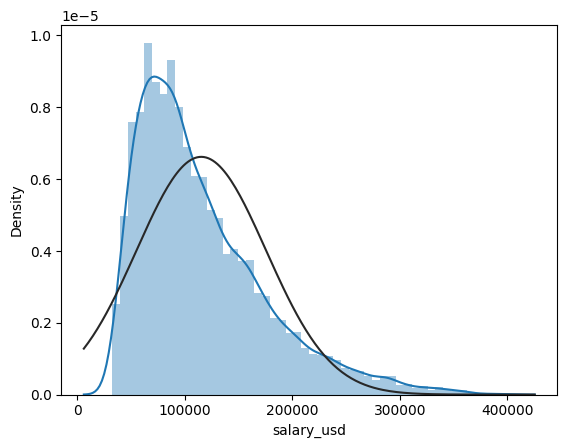

In [3]:
sns.distplot(df.salary_usd, fit=stats.norm) 

In [4]:
print('Skewness: {:.4f}'.format(df['salary_usd'].skew()))
print('Kurtosis: {:.4f}'.format(df['salary_usd'].kurt()))
print('Quartile Deviation: {:.4f}'.format((df['salary_usd'].quantile(0.75) - df['salary_usd'].quantile(0.25))/2))
print('Decile Ratio: {:.4f}'.format(df['salary_usd'].quantile(0.9)/df['salary_usd'].quantile(0.1)))

Skewness: 1.2528
Kurtosis: 1.5692
Quartile Deviation: 38114.3750
Decile Ratio: 3.7526


In [5]:
stats.kstest(df.salary_usd, 'norm', args=(df.salary_usd.mean(), df.salary_usd.std()))

KstestResult(statistic=np.float64(0.106268350383037), pvalue=np.float64(5.844235961233849e-148), statistic_location=np.int64(103942), statistic_sign=np.int8(1))

The dependent variable **salary_usd** deviates from the normal distribution, is positively skewed and leptokurtic. The mean value is 115349, the standard deviation is quite high - 60261. The median is 99705, the quartile deviation is 38114, which also characterizes a rather large spread of the central 50% of values relative to the median. The decile ratio is 3.75.


Correlation matrix (numeric):


,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
salary_usd,1.000000,0.013727,0.737556,-0.009092,0.000985
remote_ratio,0.013727,1.000000,0.015321,0.004475,0.003139
years_experience,0.737556,0.015321,1.000000,-0.007526,-0.007275
job_description_length,-0.009092,0.004475,-0.007526,1.000000,0.006744
benefits_score,0.000985,0.003139,-0.007275,0.006744,1.000000


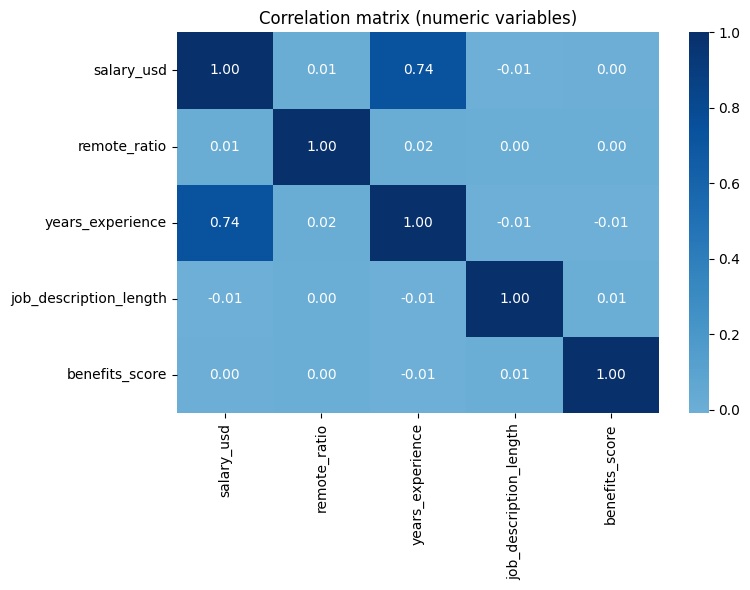

In [6]:
# lets chose metric variables!

num = df.select_dtypes(include=[np.number])
corr = num.corr()
print("\nCorrelation matrix (numeric):")
display(corr)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f",  center=0, cmap='Blues')
plt.title("Correlation matrix (numeric variables)")
plt.tight_layout()
plt.show()

In [7]:
# so lets choose these metric variables: years_experience, job_description_length, 
# benefits_score (almost same corr score as for remote ration, but looks better in current context)

metric_cols = ["years_experience", "job_description_length", "benefits_score"]

In [8]:
# lets chose cat variables

cat_candidates = list(df.select_dtypes(include=['object','category','bool']).columns)
df[cat_candidates]

,job_title,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,required_skills,education_required,industry,posting_date,application_deadline,company_name
job_id,,,,,,,,,,,,,
AI00001,AI Research Scientist,USD,SE,CT,China,M,China,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,Automotive,2024-10-18,2024-11-07,Smart Analytics
AI00002,AI Software Engineer,USD,EN,CT,Canada,M,Ireland,"Deep Learning, AWS, Mathematics, Python, Docker",Master,Media,2024-11-20,2025-01-11,TechCorp Inc
AI00003,AI Specialist,USD,MI,FL,Switzerland,L,South Korea,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,Education,2025-03-18,2025-04-07,Autonomous Tech
AI00004,NLP Engineer,USD,SE,FL,India,M,India,"Scala, SQL, Linux, Python",PhD,Consulting,2024-12-23,2025-02-24,Future Systems
AI00005,AI Consultant,EUR,EN,PT,France,S,Singapore,"MLOps, Java, Tableau, Python",Master,Media,2025-04-15,2025-06-23,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AI14996,Robotics Engineer,USD,EN,FL,Finland,S,Finland,"Java, Kubernetes, Azure",Bachelor,Energy,2025-02-06,2025-03-25,Advanced Robotics
AI14997,Machine Learning Researcher,GBP,EN,CT,United Kingdom,M,United Kingdom,"Mathematics, Docker, SQL, Deep Learning",Master,Government,2024-10-16,2024-10-30,Smart Analytics
AI14998,NLP Engineer,USD,EX,CT,South Korea,L,South Korea,"Scala, Spark, NLP",Associate,Manufacturing,2024-03-19,2024-05-02,AI Innovations


In [9]:


cols_to_exclude = [
    "job_id", "job_title", "salary_currency", "company_name", "required_skills", "job_description", "job_description_length",
    "job_location", "salary", "posting_date", "application_deadline", "job_id"
]


cat_candidates = [c for c in cat_candidates if c not in cols_to_exclude]

print(cat_candidates)
df[cat_candidates]


['experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'education_required', 'industry']


,experience_level,employment_type,company_location,company_size,employee_residence,education_required,industry
job_id,,,,,,,
AI00001,SE,CT,China,M,China,Bachelor,Automotive
AI00002,EN,CT,Canada,M,Ireland,Master,Media
AI00003,MI,FL,Switzerland,L,South Korea,Associate,Education
AI00004,SE,FL,India,M,India,PhD,Consulting
AI00005,EN,PT,France,S,Singapore,Master,Media
...,...,...,...,...,...,...,...
AI14996,EN,FL,Finland,S,Finland,Bachelor,Energy
AI14997,EN,CT,United Kingdom,M,United Kingdom,Master,Government
AI14998,EX,CT,South Korea,L,South Korea,Associate,Manufacturing



Колонки и их (nunique, missing_frac, top_freq):
  experience_level: nunique=4, missing=0.000, top_freq=0.252
  employment_type: nunique=4, missing=0.000, top_freq=0.254
  company_location: nunique=20, missing=0.000, top_freq=0.054
  company_size: nunique=3, missing=0.000, top_freq=0.334
  employee_residence: nunique=20, missing=0.000, top_freq=0.053
  education_required: nunique=4, missing=0.000, top_freq=0.253
  industry: nunique=15, missing=0.000, top_freq=0.071


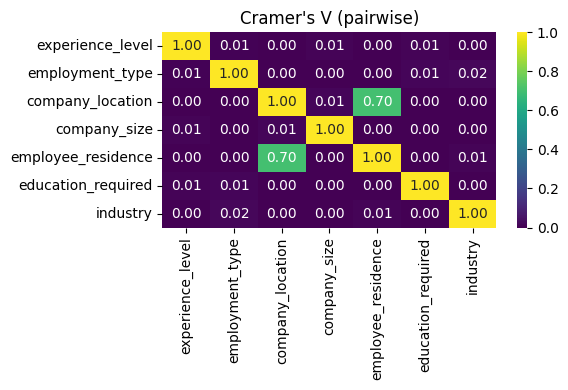


 suitable cat vars: ['experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'education_required', 'industry']


In [10]:

from scipy.stats import chi2_contingency



def cramers_v(x, y):
    x = x.fillna("___NA___")
    y = y.fillna("___NA___")
    tbl = pd.crosstab(x, y)
    if tbl.size == 0:
        return 0.0
    chi2 = chi2_contingency(tbl, correction=False)[0]
    n = tbl.sum().sum()
    if n == 0:
        return 0.0
    phi2 = chi2 / n
    r, k = tbl.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    denom = min((kcorr-1), (rcorr-1))
    if denom <= 0:
        return 0.0
    return np.sqrt(phi2corr / denom)


def col_stats(col):
    '''
    nunique - number of unique values
    missing_frac - fraction of missing values
    top_freq - share of the most frequent category among all values
    '''
    s = df[col]
    n_total = len(s)
    n_nonnull = s.notnull().sum()
    missing_frac = 1 - n_nonnull / n_total
    nunique = s.nunique(dropna=True)
    top_freq = s.value_counts(dropna=True).iloc[0] / n_nonnull if n_nonnull>0 else 0.0
    return nunique, missing_frac, top_freq

print("\nКолонки и их (nunique, missing_frac, top_freq):")
for c in cat_candidates:
    nun, miss, topf = col_stats(c)
    print(f"  {c}: nunique={nun}, missing={miss:.3f}, top_freq={topf:.3f}")


v_mat = pd.DataFrame(index=cat_candidates, columns=cat_candidates, dtype=float)
for i, a in enumerate(cat_candidates):
    v_mat.at[a, a] = 1.0
    for b in cat_candidates[i+1:]:
        v = cramers_v(df[a], df[b])
        v_mat.at[a, b] = v
        v_mat.at[b, a] = v


# heatmap
plt.figure(figsize=(max(6, len(cat_candidates)*0.4), max(4, len(cat_candidates)*0.25)))
sns.heatmap(v_mat.fillna(0).astype(float), annot=v_mat.round(3), fmt=".2f", cmap="viridis", vmin=0, vmax=1)
plt.title("Cramer's V (pairwise)")
plt.tight_layout()
plt.show()

# Пары с сильной ассоциацией
strong = []
for i, a in enumerate(cat_candidates):
    for b in cat_candidates[i+1:]:
        v = v_mat.at[a, b]
        if pd.notnull(v):
            strong.append((a, b, float(v)))


# Автоматический отбор до AUTO_SELECT_MAX, работая напрямую с df[cat_candidates]
selected = []
for c in cat_candidates:
    nun, miss, topf = col_stats(c)
    # простые правила отбора
    if miss > 0.5:
        continue
    if nun > 200:
        continue
    if topf > 0.95:
        continue
    
    too_linked = False
    for sel in selected:
        if cramers_v(df[sel].fillna("NA"), df[c].fillna("NA")) > 0.8:
            too_linked = True
            break
    if too_linked:
        continue
    selected.append(c)


print("\n suitable cat vars:", selected)



In [11]:
# since all the selected cat variables are independent of each other, we will select those that are most relevant to the context

# lets select experience_level, company_size, company_location

cat_cols = ["experience_level", "company_size", "company_location"]
df[cat_cols]

,experience_level,company_size,company_location
job_id,,,
AI00001,SE,M,China
AI00002,EN,M,Canada
AI00003,MI,L,Switzerland
AI00004,SE,M,India
AI00005,EN,S,France
...,...,...,...
AI14996,EN,S,Finland
AI14997,EN,M,United Kingdom
AI14998,EX,L,South Korea


2. Formulate research hypotheses which will be verified during the data analysis.

In [12]:
# your code here

H1 — years_experience

H₀ (Null hypothesis): The number of years of experience does not affect salary — all else equal, the effect is zero.

H₁ (Alternative hypothesis): Each additional year of experience has a positive effect on salary (i.e., more experience → higher salary).

H2 — experience_level

H₀ (Null hypothesis): The experience level does not affect salary — mean salaries are the same across all experience_level groups.

H₁ (Alternative hypothesis): At least one experience level has a different mean salary (or directionally: more senior levels receive higher salaries).

H3 — company_size

H₀ (Null hypothesis): Company size does not affect salary — the coefficients for company_size are zero (no difference between L, M, S).

H₁ (Alternative hypothesis): At least one company size category differs in mean salary (for example, larger companies pay more than smaller ones).

3. Build a multiple linear regression model using as predictors either the original metric variables or the principal components calculated based on them, along with the categorical predictors. Write down the regression equation. Assess the goodness-of-fit of the model.

In [13]:
# Minimal regression + RMSE function
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# settings
cat_cols = ["experience_level", "company_size", "company_location"]
metric_cols = ["years_experience", "job_description_length", "benefits_score"]
target = "salary_usd"

# prepare data
work = df[[target] + cat_cols + metric_cols].copy()
for c in cat_cols:
    work[c] = work[c].astype("category").cat.codes
work = work.dropna(subset=[target] + cat_cols + metric_cols)

X = work[metric_cols + cat_cols]
y = work[target].astype(float)

# fit OLS
Xc = sm.add_constant(X)
model = sm.OLS(y, Xc).fit()

# define RMSE function
def root_mean_squared_error(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# predictions and metrics
y_pred = model.predict(Xc)
rmse = root_mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse  = mean_squared_error(y, y_pred)

# print results
print(model.summary())
print("\nApproximate equation:")
coefs = model.params.round(4)
intercept = float(coefs.get("const", 0.0))
terms = " + ".join(f"{coefs.get(col,0.0)}*{col}" for col in X.columns)
print(f"salary_usd = {intercept} + {terms}")

print("\nGoodness-of-fit:")


print('R^2 = {:f}'.format(model.rsquared))
print('F-test significance = {:f}'.format(model.f_pvalue))
print('Mean Absolute Error = {:,.2f}'.format(mae))
print('Mean Squared Error  = {:,.2f}'.format(mse))
print('Root Mean Squared Error = {:,.2f}'.format(rmse))

# --- coefficient table with p-values ---
coef_table = model.summary2().tables[1].loc[:, ["Coef.", "Std.Err.", "t", "P>|t|", "[0.025", "0.975]"]]
coef_table = coef_table.rename(columns={"Coef.":"coef", "Std.Err.":"std_err", "P>|t|":"pvalue"})


# --- split into significant and nonsignificant (alpha = 0.05) ---
alpha = 0.05
significant = coef_table[coef_table["pvalue"] < alpha].copy()
nonsignificant = coef_table[coef_table["pvalue"] >= alpha].copy()

print("\nStatistically significant model parameters (p < 0.05):")
if significant.shape[0] == 0:
    print("  (none)")
else:
    print(significant.round(4).to_string())

print("\nStatistically nonsignificant model parameters (p >= 0.05):")
if nonsignificant.shape[0] == 0:
    print("  (none)")
else:
    print(nonsignificant.round(4).to_string())

# --- Regression equation (approx) ---
params = model.params.round(4)
intercept = float(params.get("const", 0.0))
terms = [f"{params.get(col,0.0)}*{col}" for col in X.columns]
equation = "salary_usd = {:.4f} + {}".format(intercept, " + ".join(terms))
print("\nRegression equation (approx):")
print(equation)




                            OLS Regression Results                            
Dep. Variable:             salary_usd   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     3986.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:35:15   Log-Likelihood:            -1.7923e+05
No. Observations:               15000   AIC:                         3.585e+05
Df Residuals:                   14993   BIC:                         3.585e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    5.8

Model is statistically significant. It explains 61% of the **salary_usd** variation.

### Regression coefficients interpretation

- On average, each additional year of experience is associated with an increase of about $8,007.73 in annual salary, holding other variables constant

- With the current integer encoding, a one-unit increase in the experience_level code corresponds to roughly +$1,134 in salary,

- Given the encoding used (L=0, M=1, S=2), moving one code step up (e.g. Large -> Medium, or Medium -> Small) is associated with a decrease of about $14,350 in salary on average

- Each one-unit increase in the location code is associated with +$1,862 on average. Because locations were encoded in alphabetical order (Australia=0 … United States=19), a difference between two countries whose codes differ by d corresponds to ≈ d * 1,862 USD difference in this model

In [16]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Breusch–Pagan test for heteroscedasticity
bp_test = het_breuschpagan(model.resid, model.model.exog)

bp_labels = ['Lagrange multiplier statistic', 'p-value',
             'f-value', 'f p-value']

print("\nBreusch–Pagan test for heteroscedasticity:")
for name, value in zip(bp_labels, bp_test):
    print(f"{name:30s}: {value:.4f}")



Breusch–Pagan test for heteroscedasticity:
Lagrange multiplier statistic : 2157.7490
p-value                       : 0.0000
f-value                       : 419.8528
f p-value                     : 0.0000


In [18]:
# White test for heteroscedasticity
white_test = het_white(model.resid, model.model.exog)

white_labels = ['LM Statistic', 'LM-Test p-value',
                'F-Statistic', 'F-Test p-value']

print("\nWhite test for heteroscedasticity:")
for name, value in zip(white_labels, white_test):
    print(f"{name:30s}: {value:.4f}")



White test for heteroscedasticity:
LM Statistic                  : 2577.2380
LM-Test p-value               : 0.0000
F-Statistic                   : 115.0409
F-Test p-value                : 0.0000


In [19]:
# Outlier detection 
influence = model.get_influence()

# standardized (studentized) residuals
standardized_resid = influence.resid_studentized_internal

# identify outliers
outliers = np.where(np.abs(standardized_resid) > 3)[0]
n_outliers = len(outliers)

print(f"\nOutliers (|standardized residual| > 3): {n_outliers} observations")



Outliers (|standardized residual| > 3): 220 observations


In [20]:
# Cook's distance
cooks_d, pvals = influence.cooks_distance
influential_cooks = np.where(cooks_d > 1)[0]
n_influential_cooks = len(influential_cooks)

# DfBetas (change in coefficients if obs removed)
dfbetas = influence.dfbetas
influential_dfbetas = np.where(np.abs(dfbetas) > 1)
n_influential_dfbetas = len(np.unique(influential_dfbetas[0]))

print(f"Influential observations (Cook's Distance > 1): {n_influential_cooks}")
print(f"Influential observations (|DfBeta| > 1): {n_influential_dfbetas}")


Influential observations (Cook's Distance > 1): 0
Influential observations (|DfBeta| > 1): 0


4. Assess the statistical significance of the regression coefficients. Compare them with each other in terms of the strength of their relationship with the dependent variable. Provide a detailed interpretation of the relationship between each predictor and the dependent variable. This is a very important part of the task, as it shows how each predictor is related to the dependent variable and what change in the dependent variable can be expected when the predictor’s value changes by one unit.

---
### Model fit 
**R-squared = 0.615**
- The model explains about 61.5% of the variance in **salary_usd**, meaning the predictors collectively provide a moderately strong fit

**Adjusted R-squared = 0.615**
- Nearly identical, indicating a well-fitted model without unnecessary predictors

**F-statistic p-value = 0.000**
- The overall regression model is statistically significant

**RMSE ≈ $37,405, MAE ≈ $27,129**
- Indicative of the average error in prediction
---
### Statistically significant predictors (p < 0.05)
#### Years of experience 
**Positive effect**
- The coefficient is approximately +8,008, meaning each additional year of experience increases predicted salary by about $8,000, holding other variables constant.
- This effect is statistically highly significant (p-value << 0.001, t ≈ 143.5), so *we reject the null Hypothesis 1 that the true coefficient is zero.*
- The 95 % confidence interval ([7,898 ; 8,117]) excludes 0, reinforcing that the relationship is real and precise.
**Interpretation**
- More years of professional experience reliably and substantially increase salary, making this the strongest predictor in the model.

#### Experience Level
**Positive effect**
- The coefficient is approximately +1,134, meaning that moving one level higher in experience category (e.g., from Entry to Mid or Mid to Senior) increases predicted salary by about $1,100, all else being equal.
- This effect is statistically significant (p-value < 0.001, t ≈ 4.1), so *we reject the null Hypothesis 2 of no difference in mean salaries across experience levels.*
- The 95 % confidence interval ([591 ; 1,678]) does not include 0, confirming the significance.
**Interpretation**
Higher job seniority is associated with higher pay, though the effect is smaller than that of years of experience.

#### Company Size
**Negative effect**
- The coefficient is approximately –14,350, meaning each step toward a smaller company (Large → Medium → Small) decreases expected salary by about $14,350, ceteris paribus.
- This effect is highly significant (p-value << 0.001, t ≈ –38.35), so *we reject the null Hypothesis 3 that company size has no effect.*
- The 95 % confidence interval ([–15,083 ; –13,617]) excludes 0, confirming a robust relationship.
**Interpretation**
- Employees at larger companies earn markedly more; moving from a large to a small firm reduces salary by roughly $28 k on average.

#### Company Location
**Positive effect**
- The coefficient is +1,862, indicating that for each unit increase in the location code (based on alphabetical order of countries), predicted salary rises by about $1,900.
- The effect is statistically significant (p < 0.001, t ≈ 35.04).
- The 95 % confidence interval ([1,758 ; 1,966]) excludes 0.
**Interpretation**
- Geographic location clearly matters for pay, but since the variable is numerically encoded, this coefficient represents an overall trend rather than real country-to-country differences.

---

### Statistically non-significant predictors (p >= 0.05)
#### Job description length 
**Near-zero effect, not significant**
- The coefficient is +336, with p = 0.11 > 0.05 and a 95 % CI ([–77 ; 749]) including 0.
**Interpretation**
- Reported benefits quality does not significantly influence salary after controlling for other factors.

#### Benefits Score 
**Non-significant**
- The coefficient is –0.49, p = 0.35 > 0.05, 95 % CI ([–1.53 ; 0.55]) includes 0.
**Interpretation**
- The length of a job posting has no measurable impact on offered salary.

---

### Conclusion

- **Significant predictors**: years_experience, experience_level, company_size, company_location.
- **Insignificant predictors**: benefits_score, job_description_length.
- The **dominant effect** is from years_experience, followed by company_size.
- All significant coefficients are in theoretically expected directions, providing strong evidence to **reject the null hypotheses H1–H3**.

5. Do the model diagnostics. Assess the distribution of the residuals. Is there any heteroscedasticity and why? How many outliers and/or influential observations are present in the model?

---

### Model diagnostics
#### Residual distribution (normality)

**Key statistics from the regression output**

- Omnibus = 2916.84, Prob(Omnibus) = 0.000
- Jarque–Bera (JB) = 8820.46, Prob(JB) = 0.000
- Skewness = 1.009, Kurtosis = 6.169

**Interpretation**

- Both Omnibus and Jarque–Bera tests are significant (p < 0.001), meaning we reject the null hypothesis of normal residuals.
- Skewness = 1.0 indicates the residuals are positively skewed — there are more cases where predicted salary < actual salary (some individuals earn far above what the model predicts).
- Kurtosis = 6.17 (>3) shows heavy tails — a few extreme values (outliers) with unusually high or low salaries.

The residuals are not normally distributed, although this is common in salary data where income distributions are right-skewed (many moderate salaries, few very high ones).

**Conclusion**

Normality assumption is violated — residuals are right-skewed and heavy-tailed.

---

#### Heteroscedasticity (constant variance of errors)

- The Breusch–Pagan test(LM = 2157.75, p < 0.001) 
- White test (LM = 2577.24, p < 0.001)
- Both tests both reject the null hypothesis of constant variance

**Conclusion**
- Residuals show heteroscedasticity — their variance increases with salary level
- This pattern is typical for income data, where higher salaries have greater variability

---

#### Autocorrelation of Errors

- Durbin–Watson = 2.022

**Interpretation**
- Durbin–Watson near 2 suggests no autocorrelation between residuals — good for cross-sectional data like this (no time-series structure).

**Conclusion**
No autocorrelation issue

---

### Outliers and influential observations

- Outliers detected: 220 observations (≈ 1.5 % of the sample)
- Influential observations (Cook’s D > 1): 0
- Influential observations (|DfBeta| > 1): 0

**Conclusion**
- A small fraction of points are statistical outliers, which is typical for salary data containing extremely high-paid positions (e.g., senior or U.S./Swiss AI roles)
- However, none of these points have Cook’s Distance > 1 or |DfBeta| > 1, indicating no single observation unduly influences the regression coefficients

---

#### Multicollinearity

Condition number = 1.05e+04 (≈10,500)

**Interpretation**
- Values above 10,000 may signal potential multicollinearity among predictors (e.g., years_experience correlated with experience_level).
- While not critical here, it could slightly inflate standard errors.

**Conclusion**
- Mild multicollinearity possible but not severe enough to distort results.

---

6. Formulate general conclusions based on the results of the regression analysis. Which of the data analysis results were expected for you, and which were unexpected?

### Regression analysis general conslusions and thoughts

---

#### Model fit

- Explains 61.5% of salary variance (F p < 0.001) with moderate prediction errors (RMSE ≈ $37,405, MAE ≈ $27,129).

---

#### Significant Predictors

- years of experience (+$8,000/year)
- experience level (+$1,100/level)
- company size (–$14,350 per step smaller)
- company location (+$1,862/unit)

Job description length and benefits score are not significant.

---

#### Residuals and Assumptions

- Residuals are right-skewed and heavy-tailed, with heteroscedasticity
- No autocorrelation detected
- Outliers (~1.5%) exist but are not influential
- Mild multicollinearity may be present

---

#### Conclusion

Experience, company characteristics, and location are the main drivers of salary; other factors have minimal effect.

---

#### What we expected

- Years of experience and company size as dominant predictors
- Higher experience level and favorable location positively influencing salary
- Residuals skewed and heteroscedastic, which is typical for income data

---

#### What was unexpected

- Job description length and benefits score have virtually no measurable impact, which may contrast with the common belief that longer or better-described postings attract higher salaries
- Mild multicollinearity indicated by the condition number, which is generally manageable but worth monitoring

---

Comments on the task and principles of its assessment:

- All points of the task must be accompanied by _executed_ code fragments.
- All results of the code execution (statistics, graphs, tables) should be commented, conclusions in the written form should be made based on them.
- If you have completed this task, you will receive 8 points (excellent grade). To get a higher grade (9 or 10), you need to go beyond the proposed task. For example, use additional regression methods or create different specifications of the model and compare them.
- This task consists of six parts, the weight of each part in the overall assessment is as follows:
    1. 15%
    2. 5%
    3. 15%
    4. 40%
    5. 20%
    6. 5%
- The task can be completed individually or in a group of 2 students, the assessment criteria will be the same.
- If the task is completed by 2 students, then only one of the students should upload the work to SmartLMS.
- The name of the file uploaded to SmartLMS should include the last name(s) of the author(s) of the work.
- If you use AI in the work, you must indicate where and how exactly it was used.

### Please upload the Jupyter Notebook with comments and answers in SmartLMS. The deadline is 16 October 23:55. 